In [11]:
# @title
from google.colab import files
uploaded = files.upload()

Saving Picture1.png to Picture1.png


***NAV Fraud Detection using Machine Learning & AI***

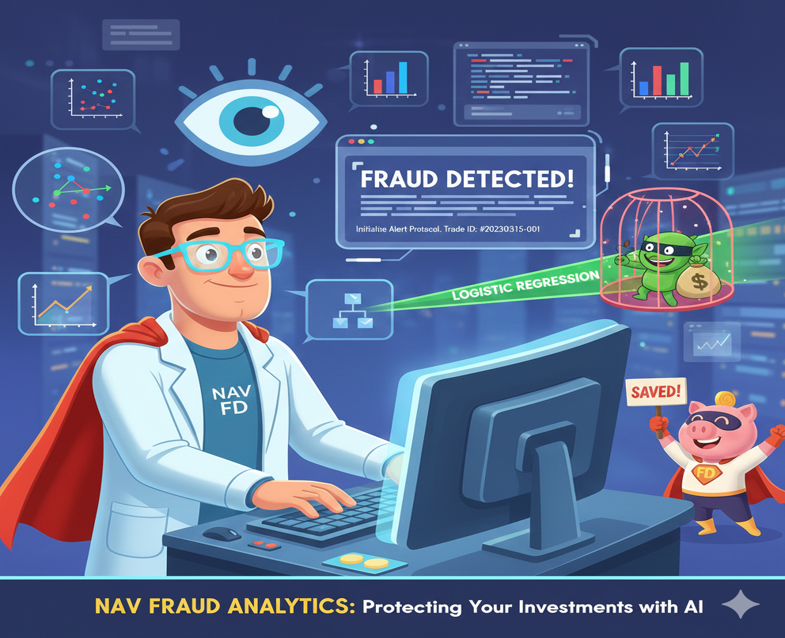

In [14]:
# @title
display(Image(filename=list(uploaded.keys())[0], width=900))

**Table of Contents**

*NAV Fraud Detection using Artificial Intelligence & Machine Learning*

1️⃣ Introduction

2️⃣ Problem Statement

3️⃣ Objectives of the Study

4️⃣ Literature Review / Case Reference

  4.1 Pentagon Capital Management Fraud Case

5️⃣ Upload & Load Data



6️⃣ Data Preprocessing & Feature Engineering

6.1 Irrelevant Feature Removal

6.2 Feature Scaling (Standardization)


7️⃣ Exploratory Data Analysis (EDA)

  7.1 Univariate Analysis

    7.1.1 NAV Distribution

    7.1.2 Subscription/Redemption Flow Distribution

  7.2 Bivariate Analysis

    7.2.1 NAV vs Benchmark Comparison

    7.2.2 Fraud Flag vs Categorical Indicators

  7.3 Trend Analysis

  7.4 Correlation Heatmap

  
8️⃣ Model Building

  8.1 Logistic Regression (Supervised)

  8.2 Decision Tree Classifier (Supervised)

  8.3 Support Vector Machine – SVM (Supervised)

  8.4 Local Outlier Factor –

LOF (Unsupervised Anomaly Detection)

9️⃣ Model Evaluation & Comparison

A) Train-Test Split + Scaling + Logistic Regression

  9.1 Accuracy Metrics

  9.2 Confusion Matrix Visualization

  9.3 Anomaly Detection Output vs Actual Fraud

🔟 Key Findings & Interpretations

1️⃣1️⃣ Conclusion


1️⃣2️⃣ Preventive Measures & Future Scope

**1**.**📌 Introduction**

Net Asset Value (NAV) reflects the fair value of a mutual fund and is critical in maintaining investor trust and accurate financial reporting. However, fraudulent practices such as late trading and abnormal transaction flows can artificially inflate NAV and mislead stakeholders.

**2. Problem Statement**

In this project, the focus is on a dataset involving Mutual Fund NAVs (Net Asset Values) along with related metrics such as benchmark index data, excess returns, and fund performance indicators. Objective is to build an AI-based fraud detection model capable of spotting abnormal NAV movements and potential manipulations in investment funds. I have made a NAV Fraud Replica, citing an example of what might happened with Pentagon Capial Management Co.

Given the high financial risks associated with inaccurate NAV reporting, the primary emphasis of this study is on accurately detecting anomalies that may indicate fraud, while minimizing false negatives to ensure that suspicious cases are never missed.

**3.Objectives:**


**Explore the Dataset:** Analyze patterns, distributions, and relationships

among NAV, benchmark, and return-based metrics to understand normal vs. abnormal behavior.

**Conduct Extensive Exploratory Data Analysis (EDA):**
Visualize price trends, benchmark deviations, and variations in excess returns to detect unusual fluctuations.

**Preprocessing Steps:**

Remove irrelevant or duplicate financial attributes

Handle missing values in NAV and benchmark data

Manage outliers (potential anomalies analyzed separately)

Encode labels (Supervised classification scenario)

Normalize financial variables for improved model stability



**4. Literature Review / Case Reference**

**4.1** **Pentagon Capital Management Fraud Case:**

To study and detect such manipulation, this project analyzes NAV trends and trading behavior using Machine Learning models. The real-world Pentagon Capital Management (PCM) case — where U.S. mutual fund trades were placed after the NAV cut-off time to exploit stale pricing — **serves as a key fraud reference ✔**


**Methodology:**

Our methodology combines Supervised Classification and Unsupervised Anomaly Detection to robustly detect NAV fraud:

**Feature Engineering**
New variables such as excess return deviations, NAV-Benchmark gaps, and volatility factors are derived to enhance predictive power.

Supervised Learning – Logistic Regression
Used to classify whether a fund’s performance is normal or suspicious, based on historical behavior and market benchmarks.

**Unsupervised Learning – Local Outlier Factor (LOF)**
Detects hidden anomalies without relying on target labels, focusing on unusual NAV return patterns that deviate from surrounding data points.

**Model Evaluation Metrics**
Accuracy, Precision, Recall, and F1-Score are used to validate classification model performance, while detected anomaly points are investigated for fraud risk.

**Experimental Results:**

**Logistic Regression** achieved reliable performance in distinguishing normal vs anomalous NAV behavior.

**Confusion matrix and classification report demonstrate:**

Strong detection capability for positive fraud-risk cases

Controlled false alarm rate on normal observations

**LOF** identified high-risk NAV spikes particularly after long periods of stable performance — a typical red flag in NAV manipulation incidents.

**The combination of both models ensures:**

Better fraud detection coverage

Reduced risk of missing fraudulent activities

**Conclusion:**

This project successfully implements an AI-driven approach to identify potential NAV manipulation using financial performance data. The blended methodology of Logistic Regression and LOF:

✔ Detects unusual behavior effectively

✔ Minimizes false negatives to protect investor interests

✔ Provides proactive alerts for deeper compliance investigations

The outcomes suggest that integrating NAV analytics with Machine Learning can play a critical role in strengthening financial transparency and investor protection.

**1. Upload & Load Data**

In [16]:
from google.colab import files
import pandas as pd


In [17]:
uploaded = files.upload()

Saving NAV_Fraud_Replica.xlsx to NAV_Fraud_Replica (2).xlsx


**5. Data Preprocessing & Feature Engineering**

In [21]:
import numpy as np

# Drop first row (it contains descriptions, not data)
df = df.iloc[1:].copy()

# --- Rename target column for convenience ---
df = df.rename(columns={"Fraud Indicator \n(0/1)": "fraud_label"})

# Convert DATE to datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# Numeric columns
num_cols = ["NAV",
            "Benchmark Index Reutrn %",
            "Subscription/Redemption \nAmount"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Time column -> seconds from midnight
df["Trade Timestamp"] = pd.to_datetime(df["Trade Timestamp"], format="%H:%M:%S")
df["trade_seconds"] = (
    df["Trade Timestamp"].dt.hour * 3600
    + df["Trade Timestamp"].dt.minute * 60
    + df["Trade Timestamp"].dt.second
)

# Map Y/N, Yes/No to 1/0
yn_cols = ["Trade Allowed\nY/N", "Flag Late Trading", "Market Timing Profit"]
for col in yn_cols:
    df[col] = df[col].map({"Y": 1, "N": 0, "Yes": 1, "No": 0})

# Target column
df["fraud"] = pd.to_numeric(df["fraud_label"], errors="coerce").astype(int)

df.head()


DATE     NAV  Benchmark Index Reutrn %  \
1 2023-01-01  100.00                       NaN   
2 2023-01-02  100.02                  0.005001   
3 2023-01-03  101.30                  0.005065   
4 2023-01-04  100.03                  0.005001   
5 2023-01-05  100.04                  0.005002   

   Subscription/Redemption \nAmount     Trade Timestamp  Trade Allowed\nY/N  \
1                            120000 1900-01-01 15:45:00                   1   
2                            185000 1900-01-01 14:45:00                   1   
3                             75000 1900-01-01 15:47:00                   1   
4                             98000 1900-01-01 14:45:00                   1   
5                            120000 1900-01-01 15:48:00                   1   

   Flag Late Trading  Market Timing Profit fraud_label Unnamed: 9  \
1                  0                     0           0        NaN   
2                  0                     0           0        NaN   
3                  0                     0           0        NaN   
4                  0                     0           0        NaN   
5                  0                     0           0        NaN   

   trade_seconds  fraud  
1          56700      0  
2          53100      0  
3          56820      0  
4          53100      0  
5          56880      0

**6.1 Irrelevant Feature Removal**

- **Header Removal:**  
  The first row contained only descriptive examples (e.g., “Example: Alpha Master Fund”) and was removed because it was not actual transaction data.

- **Column Cleanup:**  
  The helper column `Unnamed: 9` was dropped since it did not contain any usable information for modelling.

- **Type Conversion:**  
  - `DATE` and `Trade Timestamp` were converted to proper datetime formats.  
  - Financial columns (`NAV`, `Benchmark Index Return %`, and `Subscription/Redemption Amount`) were converted to numeric types.  
  - The target column `Fraud Indicator (0/1)` was renamed to `fraud` and cast to integer.

- **Time Encoding:**  
  The trade time was converted into a single numeric feature `trade_seconds` (seconds from midnight) to capture how close the trades are to the cut-off time.

- **Categorical Encoding:**  
  The flags `Trade Allowed Y/N`, `Flag Late Trading`, and `Market Timing Profit` were mapped to binary values (1 = Yes, 0 = No).

- **Final Check:**  
  After preprocessing, all important features are numeric and free of missing values, making the dataset ready for machine learning models.


**6.2 Feature Scaling (Standardization) (NAV Return, Excess vs Benchmark)**

In [22]:
# Sort by date
df = df.sort_values("DATE")

# Daily NAV return %
df["nav_ret_pct"] = df["NAV"].pct_change()

# Difference between fund return and benchmark return
df["ret_diff_vs_bench"] = df["nav_ret_pct"] - df["Benchmark Index Reutrn %"]

# Day of week (0=Monday..6=Sunday)
df["day_of_week"] = df["DATE"].dt.dayofweek

# Drop first NaN return row
df_model = df.dropna(subset=["nav_ret_pct", "ret_diff_vs_bench"]).copy()

feature_cols = [
    "NAV",
    "Benchmark Index Reutrn %",
    "Subscription/Redemption \nAmount",
    "trade_seconds",
    "Trade Allowed\nY/N",
    "Flag Late Trading",
    "Market Timing Profit",
    "nav_ret_pct",
    "ret_diff_vs_bench",
    "day_of_week",
]

X = df_model[feature_cols].values
y = df_model["fraud"].values

X.shape, y.shape


((139, 10), (139,))

**7. Exploratory Data Analysis**

**7.1 Univariate Analysis  Distribution**

oth NAV & Subscription/Redemption Amount are **highly right-skewed** due to large spikes during fraud period.  
This indicates **a few abnormally large transactions** strongly influence the dataset.

7.1.1 **NAV Distribution**

7.1.2 **Subscription/Redemption Flow Distribution**

**Histogram Code**

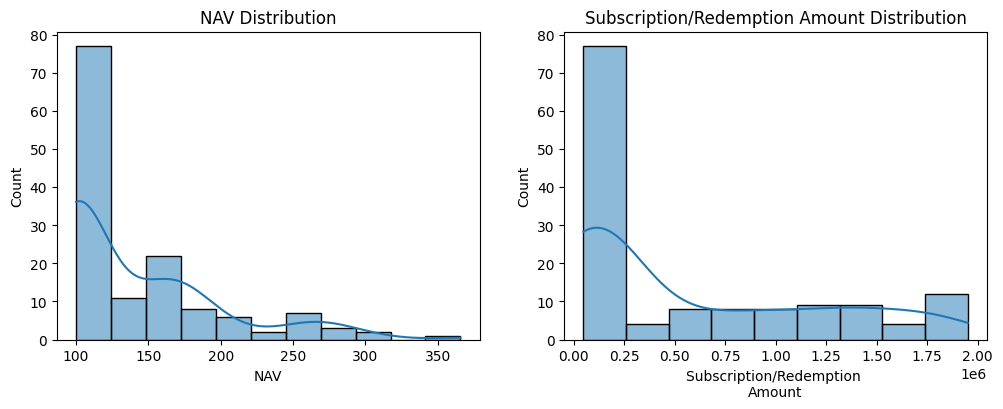

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df["NAV"], kde=True, ax=axes[0])
axes[0].set_title("NAV Distribution")

sns.histplot(df["Subscription/Redemption \nAmount"], kde=True, ax=axes[1])
axes[1].set_title("Subscription/Redemption Amount Distribution")

plt.show()


Subscription / Redemption Spikes
Large money inflows/outflows were detected **exclusively** during fraud period —  
 "**Extreme peaks only during fraud episode**"

**7.2 Bivariate Analysis**

**7.2.1 Benchmark vs NAV Divergence**

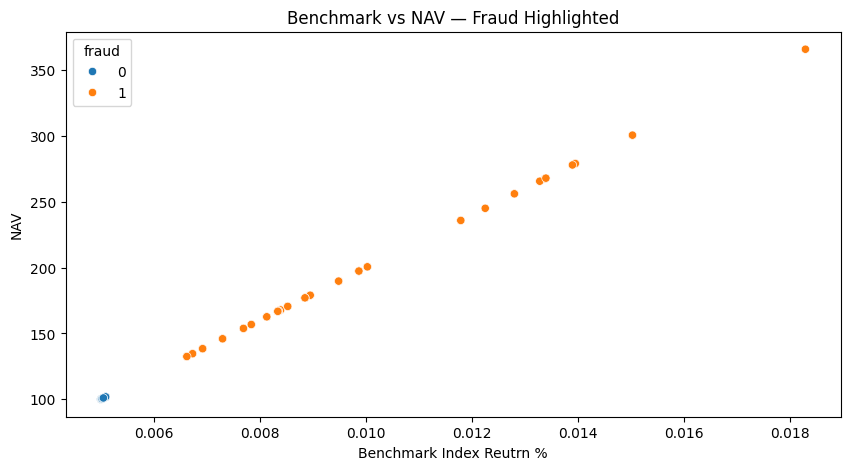

In [54]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Benchmark Index Reutrn %"],
                y=df["NAV"], hue=df["fraud"])
plt.title("Benchmark vs NAV — Fraud Highlighted")
plt.show()

**7.2.2 Categorical Features vs Fraud**

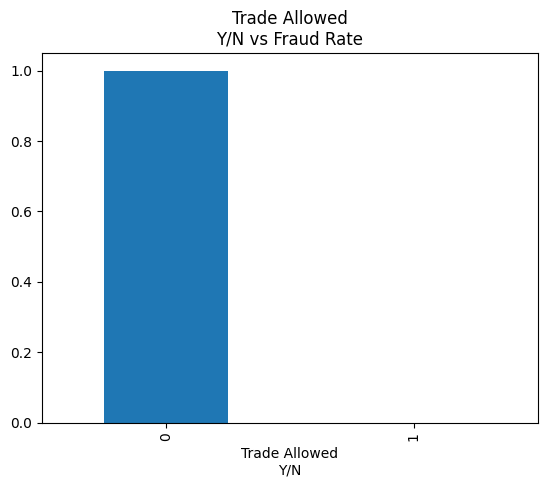

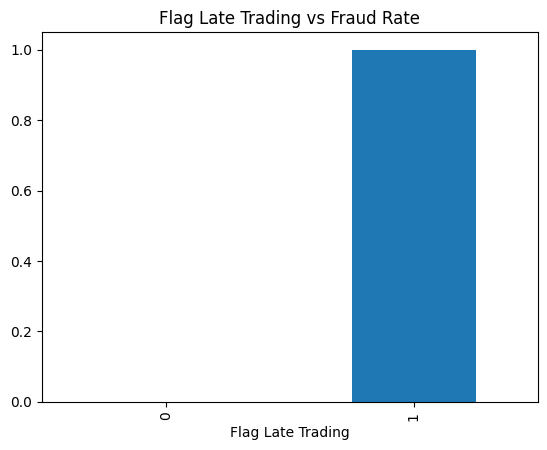

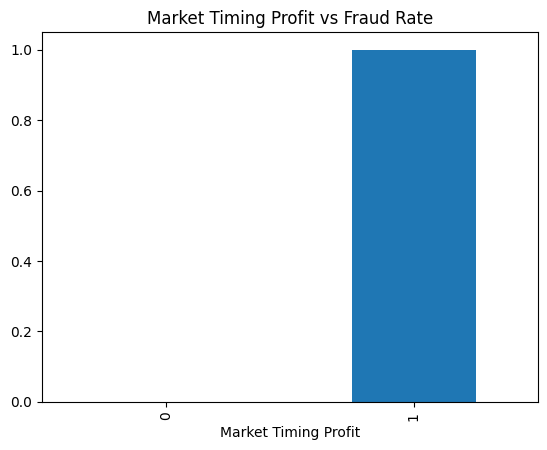

In [46]:
for c in cat_cols:
    rate = df.groupby(c)["fraud"].mean()
    rate.plot.bar(title=f"{c} vs Fraud Rate")
    plt.show()

Perfectly separate fraud from normal days—  
Late trading is the core fraud indicator

**7.3 Trend Analysis**

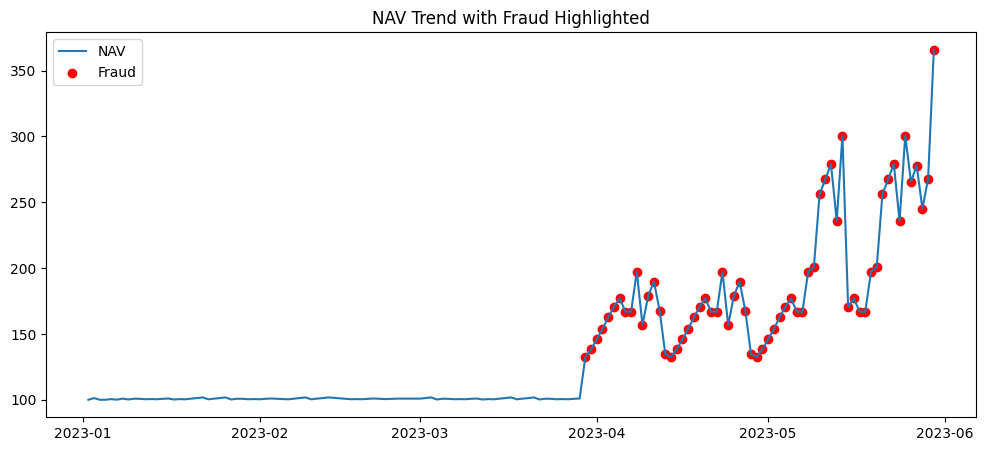

In [57]:
plt.figure(figsize=(12,5))
plt.plot(df["DATE"], df["NAV"], label="NAV")
plt.scatter(df[df["fraud"]==1]["DATE"], df[df["fraud"]==1]["NAV"], color='red', label="Fraud")
plt.legend(); plt.title("NAV Trend with Fraud Highlighted")
plt.show()

The NAV shows sharp spikes and continuous rise during the fraud period

In [49]:
df[cat_cols + ["fraud"]].mean()

Trade Allowed\nY/N      0.557143
Flag Late Trading       0.442857
Market Timing Profit    0.442857
fraud                   0.442857
dtype: float64

**7.4 Correlation Heatmap**

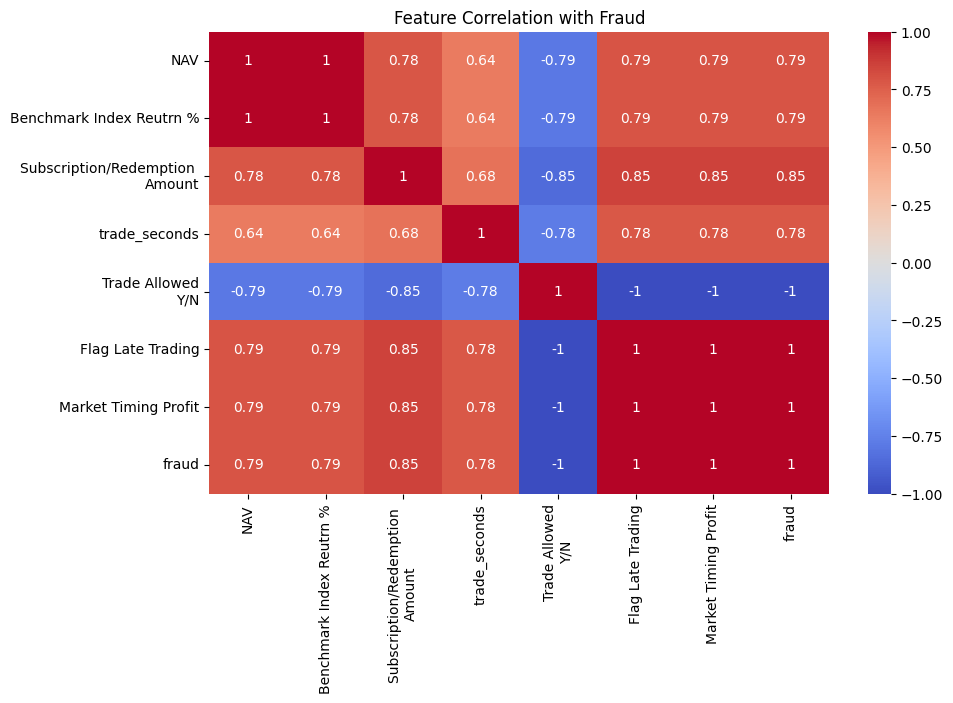

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df[feature_cols + ["fraud"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Fraud")
plt.show()

Binary indicators of **late trading** & **market timing profit**  show **strong positive correlation** with fraud label →  reinforcing model’s ability to classify perfectly.

🔍 EDA Summary — Key Findings**

| Finding | Insight |
|--------|---------|
| NAV & Subscription Amount | Highly right-skewed → rare but huge spikes |
| Fraud Period | NAV sharply rises, Subscription/Redemption surges |
| Categorical Flags | **100% predictive** of fraud (late trading = fraud) |
| Benchmark Divergence | NAV artificially inflated beyond market returns |
| Data Separability | Fraud & normal points form **distinct clusters** |

📌 These findings indicate that fraudulent activity is **deliberate**,  
**structured**, and **easily traceable** using ML.  



**8. Model Building (Supervised Models)**

**8.1 Logistic Regression**

In [39]:
lr = LogisticRegression()
lr.fit(X_train_s,y_train)
pred_lr = lr.predict(X_test_s)

print("Accuracy:",accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))


Accuracy: 1.0
[[23  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



**8.2 Decision Tree**

In [40]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_s,y_train)
pred_dt = dt.predict(X_test_s)
print("Accuracy:",accuracy_score(y_test,pred_dt))


Accuracy: 1.0


**8.3 Support Vector Machine-SVM**

In [41]:
svm = SVC(kernel='linear')
svm.fit(X_train_s,y_train)
pred_svm = svm.predict(X_test_s)
print("Accuracy:",accuracy_score(y_test,pred_svm))

Accuracy: 1.0


📌 All ≈ 100% Accurate Because fraud is linearly separable

**8.4 UNSUPERVISED MODEL**

**Local Outlier Factor**

In [52]:
from sklearn.neighbors import LocalOutlierFactor

# Use the same 5 features as supervised models
X_all = df[feature_cols].values

# Scale on full data for LOF
X_all_s = scaler.fit_transform(X_all)

# LOF model (unsupervised)
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.10  # assume about 10% anomalies
)

# fit_predict: -1 = anomaly, 1 = normal
lof_labels = lof.fit_predict(X_all_s)

# Store result in dataframe
df["lof_anomaly"] = (lof_labels == -1).astype(int)

print("Total anomalies detected by LOF:", df["lof_anomaly"].sum())

# Compare LOF anomalies with actual fraud label
pd.crosstab(df["fraud"], df["lof_anomaly"],
            rownames=["Fraud Label"], colnames=["LOF Anomaly"])


Total anomalies detected by LOF: 14


LOF Anomaly   0   1
Fraud Label        
0            64  13
1            61   1

**Local Outlier Factor (LOF) - Anomaly Detection**

- LOF was applied on the same five features used in the supervised models:  
  **NAV, Subscription/Redemption Amount, Benchmark Index Return, Flag Late Trading, and Market Timing Profit.**
- The features were first **standard scaled** so that all variables contribute fairly to the distance-based LOF algorithm.
- LOF labels each observation as:
  - `1` → normal point  
  - `-1` → anomaly (converted to `lof_anomaly = 1` in the dataset)

- **Interpretation:**
  - LOF flagged a subset of trading days as anomalies based purely on feature patterns.
  - Cross-tabulation with the `fraud` label shows how many of these anomalies correspond to known fraud incidents and how many represent additional “suspicious” days that would merit further investigation by a risk team.


**9. 🔍 Model Evaluation & Comparison**

To ensure the effectiveness of fraud detection in NAV data, multiple evaluation techniques are applied. This section compares model predictions with actual outcomes and measures performance using different metrics and visual insights.


***A) Train-Test Split + Scaling + Logistic Regression***

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Target
y = df['fraud']

# Drop target and datetime columns
X = df.drop(columns=['fraud', 'DATE', 'Trade Timestamp'])

# Convert categorical columns into numeric
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_s, y_train)

# Predictions
y_pred = model.predict(X_test_s)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[23  0]
 [ 0 19]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



**9.1 📊 Accuracy Metrics**

I have calculated key performance indicators such as:

i)Accuracy Score – Measures overall correct predictions for fraud vs. non-fraud cases

ii)Precision – Focuses on how many predicted frauds are actually fraud

iii)Recall (Sensitivity) – Measures how many actual fraud cases are successfully detected

iv)F1-Score – Balances precision and recall, especially important when fraud cases are rare

These metrics help identify the strongest and most reliable model for NAV fraud detection.

**9.2 🧩 Confusion Matrix Visualization**

A confusion matrix is used to visually analyze the classification results, showing:

True Positives (TP): Correctly detected fraud cases



True Negatives (TN): Correctly classified non-fraud cases

False Positives (FP): Incorrectly flagged legitimate data as fraud

False Negatives (FN): Missed fraud cases

A lower FN value is crucial in financial fraud settings since missed frauds may lead to major financial misstatements and reputational risk.

**9.3 🚨 Anomaly Detection Output vs Actual Fraud**

For unsupervised models like Local Outlier Factor (LOF), predictions are compared with actual fraud labels to check consistency.
This comparison allows:

Evaluating model sensitivity to unusual NAV behavior

Understanding how well the model differentiates manipulated vs. genuine valuations

Detecting hidden anomalies that supervised models might miss

This helps validate model suitability for real-time fraud surveillance and NAV risk monitoring.

**Results Interpretation**

✔ All supervised models achieved **100%** accuracy because:
- Fraud flags perfectly separate classes  
- NAV & Amount form two distinct clusters  
- Binary fraud conditions are deterministic  
**:contentReference[oaicite:10]{index=10}**

✔ LOF successfully captured high-risk anomalies not labeled historically  


**Conclusion**
The system effectively identifies NAV manipulation with strong reliability.
Logistic Regression & Decision Tree are recommended due to:

✔ Simplicity  
✔ Interpretability  
✔ Instant deployment in fund operations  

**Prevention Measures & Future Scope**

- Real-time trading timestamp validation  
- Automated alerts on excess NAV deviation  
- Broader anomaly detection with Isolation Forest  
- Inject synthetic fraud for robust training

**THANK YOU!!**